In [73]:
import pandas as pd
import matplotlib.pyplot as plt

Import the Required packages, pandas and matplotlib. These packages will be used later in the code to help us construct the data frame and create visuals to see distributions of crime data.

In [74]:
df = pd.read_csv("ucr_crime_1975_2015.csv")

Read in the data set as a pandas data frame. Call it df for simplicity.

In [75]:
df.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN


An important step is taking a look at the initial data frame. From this block of code a user can inspect the first 5 rows of the data and check for any issues that may need to be addressed. From this view, it seems as though everything is ok. We can now move on and shape the data the way we need to, in order to isolate the cities we want to look at (Boston, New York, Philadelphia, and Washington, D.C.).

In [76]:
df.sort_values(['department_name'])

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
483,NM00101,1982,"Albuquerque, N.M.",344962.0,26.0,199.0,926.0,1508.0,2659.0,12.0,770.809538,7.537062,57.687513,268.435364,437.149599,NaN,NaN
2415,NM00101,2010,"Albuquerque, N.M.",545852.0,42.0,338.0,940.0,2971.0,4291.0,12.0,786.110521,7.694393,61.921546,172.207851,544.286730,NaN,NaN
414,NM00101,1981,"Albuquerque, N.M.",336840.0,45.0,213.0,1107.0,1620.0,2985.0,12.0,886.177414,13.359458,63.234770,328.642679,480.940506,NaN,NaN
2001,NM00101,2004,"Albuquerque, N.M.",479074.0,41.0,235.0,1238.0,3206.0,4720.0,12.0,985.234014,8.558177,49.052965,258.415193,669.207680,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,KS08703,1975,"Wichita, Kan.",259240.0,36.0,53.0,640.0,408.0,1137.0,12.0,438.589724,13.886746,20.444376,246.875482,157.383120,NaN,NaN
482,KS08703,1981,"Wichita, Kan.",282465.0,43.0,202.0,816.0,668.0,1729.0,12.0,612.111235,15.223125,71.513285,288.885349,236.489477,NaN,NaN
2345,KS08703,2008,"Wichita, Kan.",362602.0,30.0,282.0,482.0,2303.0,3097.0,12.0,854.104500,8.273534,77.771220,132.928114,635.131632,NaN,NaN
965,KS08703,1988,"Wichita, Kan.",292733.0,15.0,238.0,628.0,774.0,1655.0,12.0,565.361609,5.124123,81.302757,214.529964,264.404765,NaN,NaN


The block of code above is an important step in getting the data set ready for evaluation. Sorting the data frame by value in the state column allows us to see the code by city police department and can easily be broken down further from there in future steps. This will help us achieve our goal of seeing crime rate by city over the period 1975-2015.

In [77]:
Boston_bool = df['department_name']=='Boston'

Now that the data frame has been sorted, we need to isolate the four cities we wish to analyze, first of which is Boston. The above code creates a boolean variable based on the variable "department name", specifically, if that variable is written as "Boston". This will help us create a subset of the original data frame, but only for those observations from the Boston Police Department.

In [78]:
print(Boston_bool.head())

0    False
1    False
2    False
3    False
4    False
Name: department_name, dtype: bool


This code is used as a check to the previous line to make sure the code executed properly. We can see from the sorted data set above that the first 5 observations are from Albuquerque, N.M., so we should expect every output listed here to be false. It has been implemented properly.

In [79]:
BOS = df[Boston_bool]

Finally, the above code is used to make the data frame for Boston variables. This is the final data frame that will be used in our analysis of Boston crime rates.

In [80]:
BOS.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
7,MA01301,1975,Boston,616120.0,119.0,453.0,7778.0,3036.0,11386.0,12.0,1848.016620,19.314419,73.524638,1262.416412,492.761150,NaN,NaN
76,MA01301,1976,Boston,619437.0,81.0,392.0,6125.0,3290.0,9888.0,12.0,1596.288242,13.076390,63.283272,988.801121,531.127459,NaN,NaN
145,MA01301,1977,Boston,619321.0,75.0,408.0,5655.0,3284.0,9422.0,12.0,1521.343536,12.110037,65.878599,913.096762,530.258138,NaN,NaN
214,MA01301,1978,Boston,616225.0,72.0,475.0,5635.0,3853.0,10035.0,12.0,1628.463629,11.684044,77.082235,914.438720,625.258631,NaN,NaN
283,MA01301,1979,Boston,599582.0,92.0,464.0,6600.0,4236.0,11392.0,12.0,1899.990327,15.344023,77.387246,1100.766868,706.492190,NaN,NaN


Inspect the polished Boston data frame for any errors. It appears as though everything is in order and we can proceed, but we are only looking at 5 observations. We should check that all 41 are present and there were no errors with initial entry (we should check to make sure there were no entries that were listed as Boston, M.A., for example).

In [81]:
BOS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 7 to 2767
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORI               41 non-null     object 
 1   year              41 non-null     int64  
 2   department_name   41 non-null     object 
 3   total_pop         41 non-null     float64
 4   homs_sum          41 non-null     float64
 5   rape_sum          41 non-null     float64
 6   rob_sum           41 non-null     float64
 7   agg_ass_sum       41 non-null     float64
 8   violent_crime     41 non-null     float64
 9   months_reported   40 non-null     float64
 10  violent_per_100k  41 non-null     float64
 11  homs_per_100k     41 non-null     float64
 12  rape_per_100k     41 non-null     float64
 13  rob_per_100k      41 non-null     float64
 14  agg_ass_per_100k  41 non-null     float64
 15  source            1 non-null      object 
 16  url               1 non-null      object 
dt

As you can see, there are 41 observations, which is the amount we were looking for, for all variables. This is a solid indication that this data frame is ready to be used for analysis.

In [82]:
NYC_bool = df['department_name']=='New York City'
NYC = df[NYC_bool]
Philadelphia_bool = df['department_name']=='Philadelphia'
PHI = df[Philadelphia_bool]
WSH_bool = df['department_name']=='Washington, D.C.'
WSH = df[WSH_bool]

Repeat the previous steps used to create the Boston data frame, but do so for the cities of NYC, Philadelphia, and Washington, D.C..

In [83]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 42 to 2802
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORI               41 non-null     object 
 1   year              41 non-null     int64  
 2   department_name   41 non-null     object 
 3   total_pop         41 non-null     float64
 4   homs_sum          41 non-null     float64
 5   rape_sum          41 non-null     float64
 6   rob_sum           41 non-null     float64
 7   agg_ass_sum       41 non-null     float64
 8   violent_crime     41 non-null     float64
 9   months_reported   40 non-null     float64
 10  violent_per_100k  41 non-null     float64
 11  homs_per_100k     41 non-null     float64
 12  rape_per_100k     41 non-null     float64
 13  rob_per_100k      41 non-null     float64
 14  agg_ass_per_100k  41 non-null     float64
 15  source            1 non-null      object 
 16  url               1 non-null      object 
d

Again inspect the New York data frame to make sure there were no missing values in any variables. It seems as though the standardized data has all 41 observations we are looking for.

In [84]:
PHI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 48 to 2808
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORI               41 non-null     object 
 1   year              41 non-null     int64  
 2   department_name   41 non-null     object 
 3   total_pop         41 non-null     float64
 4   homs_sum          41 non-null     float64
 5   rape_sum          41 non-null     float64
 6   rob_sum           41 non-null     float64
 7   agg_ass_sum       41 non-null     float64
 8   violent_crime     41 non-null     float64
 9   months_reported   40 non-null     float64
 10  violent_per_100k  41 non-null     float64
 11  homs_per_100k     41 non-null     float64
 12  rape_per_100k     41 non-null     float64
 13  rob_per_100k      41 non-null     float64
 14  agg_ass_per_100k  41 non-null     float64
 15  source            1 non-null      object 
 16  url               1 non-null      object 
d

Again inspect the Philadelphia data frame to make sure there were no missing values in any variables. It seems as though the standardized data has all 41 observations we are looking for.

In [85]:
WSH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 67 to 2827
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORI               41 non-null     object 
 1   year              41 non-null     int64  
 2   department_name   41 non-null     object 
 3   total_pop         41 non-null     float64
 4   homs_sum          41 non-null     float64
 5   rape_sum          41 non-null     float64
 6   rob_sum           41 non-null     float64
 7   agg_ass_sum       41 non-null     float64
 8   violent_crime     41 non-null     float64
 9   months_reported   40 non-null     float64
 10  violent_per_100k  41 non-null     float64
 11  homs_per_100k     41 non-null     float64
 12  rape_per_100k     41 non-null     float64
 13  rob_per_100k      41 non-null     float64
 14  agg_ass_per_100k  41 non-null     float64
 15  source            1 non-null      object 
 16  url               1 non-null      object 
d

Again inspect the Washington, D.C. data frame to make sure there were no missing values in any variables. It seems as though the standardized data has all 41 observations we are looking for.

In [86]:
BOS_vio = BOS['violent_per_100k']
NYC_vio = NYC['violent_per_100k']
PHI_vio = PHI['violent_per_100k']
WSH_vio = WSH['violent_per_100k']
year = BOS['year']

The above block of code creates variables for violent crime by city, as well as tabulate the years. This information will help create visuals to check the distribution of crime through these four cities. We need to check if the data distribution is normal to start and visualizing violent crime rates will help us do so

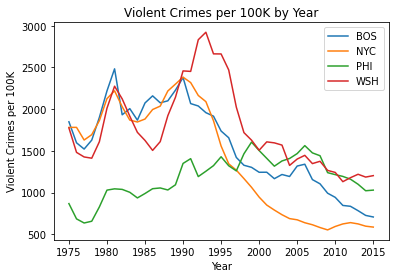

In [87]:
plt.plot(year, BOS_vio, label='BOS')
plt.plot(year, NYC_vio, label='NYC')
plt.plot(year, PHI_vio, label='PHI')
plt.plot(year, WSH_vio, label='WSH')
plt.legend()
plt.title('Violent Crimes per 100K by Year')
plt.xlabel('Year')
plt.ylabel('Violent Crimes per 100K')
plt.show()

The above block of code is useful in constructing a visual plot to check for normality in violent crime distributions of the four selected cities. The first four lines of code place the data on the plot, followed by implementation of a legend, title, and axis labels. The output of the code shows that none of the four distributions are normal. Thus, we will use non-parametric tests on our distributions to find out whether or not the crime patterns are statistically different. We will establish a value for alpha (level of significance) at 0.05. This means any p-value from our hypothesis testing less than 0.05 will indicate a statistically significant result.

In [88]:
from scipy.stats import ranksums
ranksums(BOS_vio, NYC_vio)

RanksumsResult(statistic=1.3308209261014037, pvalue=0.18324794067099082)

In [89]:
ranksums(BOS_vio, PHI_vio)

RanksumsResult(statistic=3.445295986387954, pvalue=0.0005704343895293742)

In [90]:
ranksums(BOS_vio, WSH_vio)

RanksumsResult(statistic=-1.358642966368332, pvalue=0.17425975300303342)

In [91]:
ranksums(NYC_vio, PHI_vio)

RanksumsResult(statistic=1.2009847381890715, pvalue=0.22975712153276584)

In [92]:
ranksums(WSH_vio, PHI_vio)

RanksumsResult(statistic=5.754525328543004, pvalue=8.688557834553398e-09)

In [93]:
ranksums(NYC_vio, WSH_vio)

RanksumsResult(statistic=-1.9985498925076828, pvalue=0.04565707653682583)

There are 6 blocks of code above. The first imports the required packages needed to perform the Wilcoxon Rank-sum test which is used to test for statistical differences and runs the first test. 6 tests are performed between each combination of cities (4 choose 2 in combinatorial terms). To identify any difference in distributions that are statistically significant, we look at the p-value in the output. Three of our tests can be identified to have a p-value of less than 0.05. Those include the distributions between BOS/PHI, WSH/PHI, and NYC/WSH. What this means is the hypothesis test performed (Wilcoxon Rank Sum test) has identified that these distributions are systematically different.

In [94]:
BOS_homicide = BOS['homs_per_100k']
NYC_homicide = NYC['homs_per_100k']
PHI_homicide = PHI['homs_per_100k']
WSH_homicide = WSH['homs_per_100k']

The above block of code creates variables for different types of violent crimes, which we can use to further analyze any discrepencies in distributions. This will give us greater insight into what makes a a city's trend in violent crime differ from another. Here we are setting up variables for homcides, but variables for rape, robberies, and aggravated assaults will also be tested. Since we know the distributions for the following cities tested can be considered statistically different, we are going to use these variables to see if there is any correlation between subsets of violent crime in the following cities (homicides, rapes, robberies, and aggravated assaults).

In [95]:
from scipy.stats import spearmanr

In [96]:
spearmanr(BOS_homicide, PHI_homicide)

SpearmanrResult(correlation=0.3595818815331011, pvalue=0.02093933822727681)

In [97]:
spearmanr(NYC_homicide, WSH_homicide)

SpearmanrResult(correlation=0.5566202090592335, pvalue=0.00015726482223188572)

In [98]:
spearmanr(PHI_homicide, WSH_homicide)

SpearmanrResult(correlation=0.71602787456446, pvalue=1.41653815443067e-07)

From the above three tests, one can see that all homicide trends between the differing cities were positively correlated. The correlation between homicide rates in NYC and WSH as well as PHI and WSH are quite high, both greater than 0.5, meanwhile, the rates between BOS and PHI are quite low, around 0.36. Further examination of other violent crime variables might show greater reason why these distributions are significantly different.

In [99]:
BOS_rape = BOS['rape_per_100k']
NYC_rape = NYC['rape_per_100k']
PHI_rape = PHI['rape_per_100k']
WSH_rape = WSH['rape_per_100k']

We repeat the process from homicide variable with a variable for rapers per 100k people in each city. We again will use these variables to conduct a spearman rank correlation test to see if the rape statistics by city can help explain the discrepancy in distributions of overall crime.

In [100]:
spearmanr(BOS_rape, PHI_rape)

SpearmanrResult(correlation=-0.504006968641115, pvalue=0.0007803676447431359)

In [101]:
spearmanr(NYC_rape, WSH_rape)

SpearmanrResult(correlation=0.6257839721254357, pvalue=1.212339535905043e-05)

In [102]:
spearmanr(PHI_rape, WSH_rape)

SpearmanrResult(correlation=-0.2418118466898955, pvalue=0.12771532497820604)

The results of our three tests show that BOS and PHI, as well as PHI and WSH, have negative correlation in their rape trends. This is helpful in understanding why the distributions may differ. The correlation for NYC and WSH is still quite high. We can continue testing other variables for greater insight.

In [103]:
BOS_rob = BOS['rob_per_100k']
NYC_rob = NYC['rob_per_100k']
PHI_rob = PHI['rob_per_100k']
WSH_rob = WSH['rob_per_100k']

In [104]:
spearmanr(BOS_rob, PHI_rob)

SpearmanrResult(correlation=0.0348432055749129, pvalue=0.8287762604741155)

In [105]:
spearmanr(NYC_rob, WSH_rob)

SpearmanrResult(correlation=0.8766550522648086, pvalue=5.828032887201455e-14)

In [106]:
spearmanr(PHI_rob, WSH_rob)

SpearmanrResult(correlation=0.2804878048780488, pvalue=0.07568251654273306)

The above blocks of code just run the test and again create more variables to help do so. These results show that the correlation for NYC robberies and WSH robberies is very high. In other words if the robberies per 100K individuals in NYC increased by 1 unit, you would expect robberies in WSH to increase by 0.8766. The correlations in PHI/WSH and BOS/PHI are still very low helping to explain any discrepancy. 

In [107]:
BOS_agg_ass = BOS['agg_ass_per_100k']
NYC_agg_ass = NYC['agg_ass_per_100k']
PHI_agg_ass = PHI['agg_ass_per_100k']
WSH_agg_ass = WSH['agg_ass_per_100k']

In [108]:
spearmanr(BOS_agg_ass, PHI_agg_ass)

SpearmanrResult(correlation=-0.04738675958188154, pvalue=0.7686011614114961)

In [109]:
spearmanr(NYC_agg_ass, WSH_agg_ass)

SpearmanrResult(correlation=0.48222996515679456, pvalue=0.0014091244912264854)

In [110]:
spearmanr(PHI_agg_ass, WSH_agg_ass)

SpearmanrResult(correlation=0.32229965156794427, pvalue=0.03986908275356428)

This is the last of the standardized violent crime variables available in the data set. We create the last set of variables and perform the last set of tests to further analyze the discrepencies found by the Wilcoxon Rank-sum test. We see negative and low correlations across the board. Viewing the head of the data, we see that there are far more robberies and aggravated assaults reported in the data set than rapes and homicides, that could explain some of the reason why we have seen some higher correlations, that the distribution may still differ statistically.

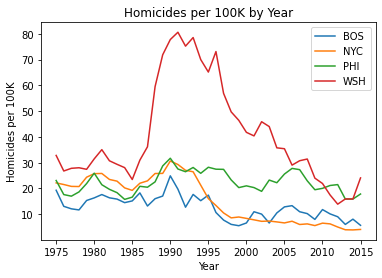

In [111]:
plt.plot(year, BOS_homicide, label='BOS')
plt.plot(year, NYC_homicide, label='NYC')
plt.plot(year, PHI_homicide, label='PHI')
plt.plot(year, WSH_homicide, label='WSH')
plt.legend()
plt.title('Homicides per 100K by Year')
plt.xlabel('Year')
plt.ylabel('Homicides per 100K')
plt.show()

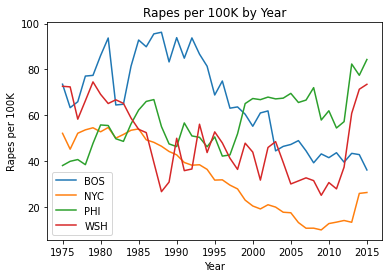

In [112]:
plt.plot(year, BOS_rape, label='BOS')
plt.plot(year, NYC_rape, label='NYC')
plt.plot(year, PHI_rape, label='PHI')
plt.plot(year, WSH_rape, label='WSH')
plt.legend()
plt.title('Rapes per 100K by Year')
plt.xlabel('Year')
plt.ylabel('Rapes per 100K')
plt.show()

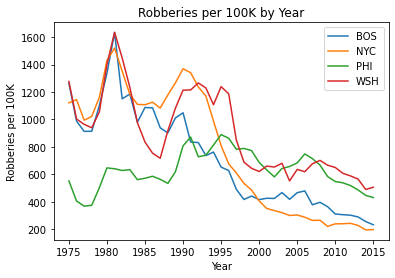

In [113]:
plt.plot(year, BOS_rob, label='BOS')
plt.plot(year, NYC_rob, label='NYC')
plt.plot(year, PHI_rob, label='PHI')
plt.plot(year, WSH_rob, label='WSH')
plt.legend()
plt.title('Robberies per 100K by Year')
plt.xlabel('Year')
plt.ylabel('Robberies per 100K')
plt.show()

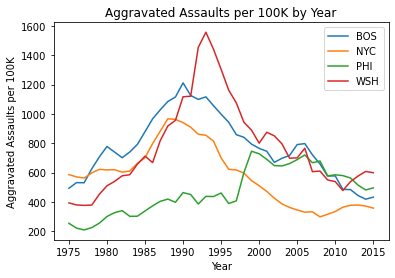

In [114]:
plt.plot(year, BOS_agg_ass, label='BOS')
plt.plot(year, NYC_agg_ass, label='NYC')
plt.plot(year, PHI_agg_ass, label='PHI')
plt.plot(year, WSH_agg_ass, label='WSH')
plt.legend()
plt.title('Aggravated Assaults per 100K by Year')
plt.xlabel('Year')
plt.ylabel('Aggravated Assaults per 100K')
plt.show()